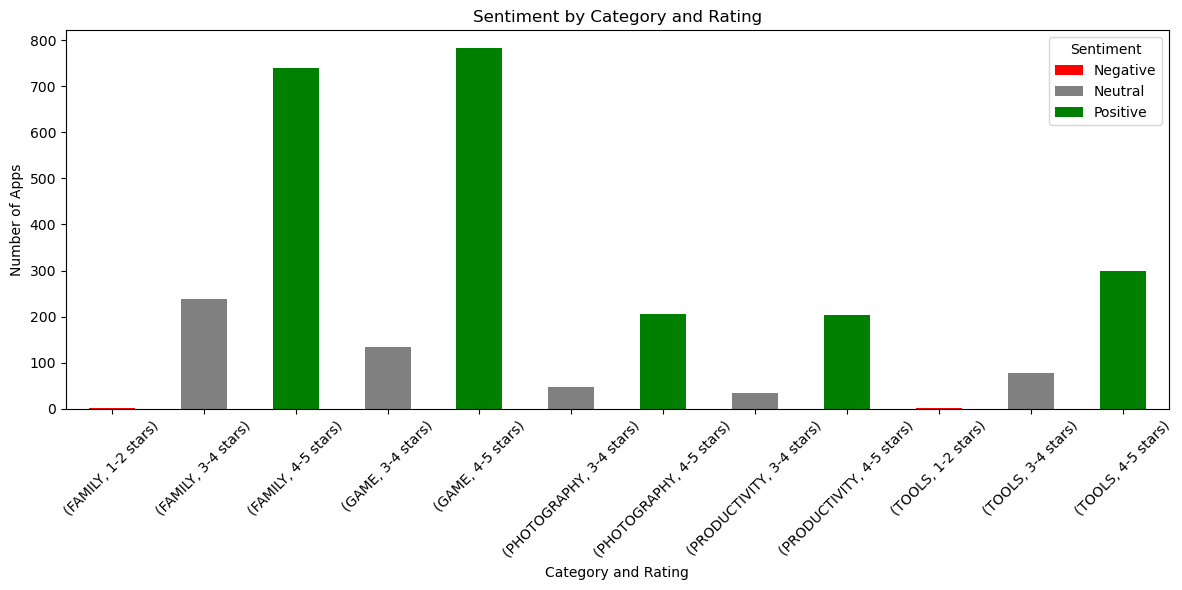

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('googleplaystore.csv')
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce') 
data = data.dropna(subset=['Reviews', 'Rating', 'Category'])      
data = data[data['Reviews'] > 1000]                             
def get_rating_group(rating):
    if rating <= 2:
        return '1-2 stars'
    elif rating <= 4:
        return '3-4 stars'
    else:
        return '4-5 stars'
data['Rating Group'] = data['Rating'].apply(get_rating_group)
top_5 = data['Category'].value_counts().head(5).index  
data = data[data['Category'].isin(top_5)]            
data['Sentiment'] = data['Rating Group'].replace({
    '1-2 stars': 'Negative',
    '3-4 stars': 'Neutral',
    '4-5 stars': 'Positive'
})
counts = data.groupby(['Category', 'Rating Group', 'Sentiment']).size().unstack(fill_value=0)
counts.plot(kind='bar', stacked=True, figsize=(12,6), color=['red', 'gray', 'green'])
plt.title('Sentiment by Category and Rating')
plt.xlabel('Category and Rating')
plt.ylabel('Number of Apps')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()